In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [2]:
# Set up directories for training and testing
train_dir = "E:/4TH YEAR/CAPSTONE/ORGANISED DATASET/train"
test_dir = "E:/4TH YEAR/CAPSTONE/ORGANISED DATASET/test"

# Set image size and batch size
IMG_HEIGHT = 224  # VGG19 input size
IMG_WIDTH = 224   # VGG19 input size
BATCH_SIZE = 32

In [3]:
# Image Preprocessing using ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize the image
    rotation_range=30,  # Random rotations
    width_shift_range=0.2,  # Random horizontal shifts
    height_shift_range=0.2,  # Random vertical shifts
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,  # Zoom in/out
    horizontal_flip=True,  # Random horizontal flips
    fill_mode='nearest'  # Filling missing pixels after transformations
)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescaling for the test set


In [4]:
# Load train and test generators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Binary classification (benign vs malignant)
    shuffle=True
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',  # Binary classification (benign vs malignant)
    shuffle=False  # Don't shuffle for evaluation
)

Found 6186 images belonging to 2 classes.
Found 1723 images belonging to 2 classes.


In [5]:
# Build the VGG19 Model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3))

# Freeze the base model layers (so they are not trained)
base_model.trainable = False

# Create the full model by adding custom layers
model = Sequential([
    base_model,  # Add the pre-trained VGG19 base
    Flatten(),  # Flatten the output of the convolutional layers
    Dense(128, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Dropout for regularization
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])


In [6]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
# Set up EarlyStopping to stop training early if validation loss doesn't improve
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [8]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator,
    callbacks=[early_stopping]  # Use early stopping to prevent overfitting
)

Epoch 1/10


C:\Users\KMS\anaconda3\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


194/194 ━━━━━━━━━━━━━━━━━━━━ 3400s 17s/step - accuracy: 0.6590 - loss: 0.9222 - val_accuracy: 0.6860 - val_loss: 0.5344
Epoch 2/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 3346s 17s/step - accuracy: 0.6835 - loss: 0.5928 - val_accuracy: 0.6860 - val_loss: 0.5468
Epoch 3/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 3345s 17s/step - accuracy: 0.6812 - loss: 0.6008 - val_accuracy: 0.6860 - val_loss: 0.5317
Epoch 4/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 3344s 17s/step - accuracy: 0.6832 - loss: 0.5778 - val_accuracy: 0.6860 - val_loss: 0.5015
Epoch 5/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 3333s 17s/step - accuracy: 0.6966 - loss: 0.5633 - val_accuracy: 0.6860 - val_loss: 0.4987
Epoch 6/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 3341s 17s/step - accuracy: 0.6843 - loss: 0.5759 - val_accuracy: 0.6860 - val_loss: 0.4956
Epoch 7/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 3334s 17s/step - accuracy: 0.6833 - loss: 0.5695 - val_accuracy: 0.6860 - val_loss: 0.4992
Epoch 8/10
194/194 ━━━━━━━━━━━━━━━━━━━━ 3339s 17s/step - accuracy: 0.6893 - loss: 0.5662 - val

In [19]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

54/54 ━━━━━━━━━━━━━━━━━━━━ 723s 13s/step - accuracy: 0.3361 - loss: 0.7818
Test accuracy: 68.60%


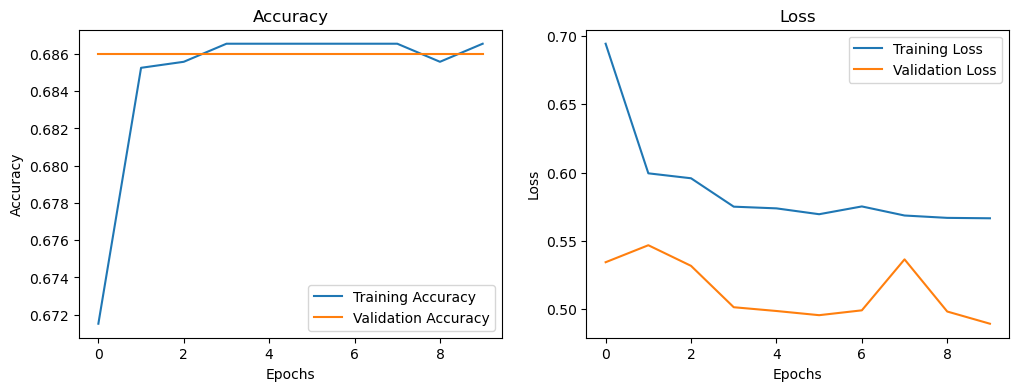

In [20]:
# Plot the training and validation accuracy and loss over epochs
plt.figure(figsize=(12, 4))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [32]:
# To make predictions on a new image
from tensorflow.keras.preprocessing import image
import numpy as np

# Example image path (replace with the path of an image you want to test)
img_path = r"E:\4TH YEAR\CAPSTONE\ORGANISED DATASET\train\malignant\lobular_carcinoma\SOB_M_LC_14-13412\100X\SOB_M_LC-14-13412-100-006.png"

# Load and preprocess the image
img = image.load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
img_array = image.img_to_array(img)  # Convert the image to an array
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.0  # Normalize the image

# Make a prediction
prediction = model.predict(img_array)
if prediction < 0.5:
    print("Predicted class: Benign")
else:
    print("Predicted class: Malignant")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted class: Malignant
